# Игра в тир
Данная программа реализует симуляцию игры в дартс с визуализацией попадания дротика в мишень и расчетом вероятности этого события.\
### Постановка задачи
Имеется квадратное поле с центром в точке (6; 6) и стороной, равной:
$$side = \sqrt{2\pi R^{2}}, \text{где R = 5}$$
В центре поля расположен ромб, являющийся мишенью, с такими же координатами центра, как и у основного поля.\
Ромб задается с помощью четырех точек:\
    $$(x_{0}, y_{0}+R)$$ \
    $$(x_{0}+R, y_{0})$$ \
    $$(x_{0}, y_{0}-R)$$ \
    $$(x_{0}-R, y_{0})$$ \
Случайным образом генерируются N выстрелов, подсчитывается количество попаданий внутрь ромба. Условие попадания:
$$\left|X-x_{0} \right|+\left|Y-y_{0} \right|\le R$$
Оценивается вероятность попадания как отношение числа успешных попаданий к общему числу бросков.\

### Математическое обоснование:
Вероятность попадания в мишень оценим как отношение числа успешных попаданий к общему числу попаданий.
$$P=\frac{N_{попаданий}}{M_{бросков}}=\frac{S_{мишени}}{S_{поля}}$$
Где:
$$S_{мишени}=2R^{2}$$
$$S_{поля}=2\pi R^{2}$$
Рассчитаем теоретическую вероятность:
$$\frac{2R^{2}}{2\pi R^{2}}=\frac{1}{\pi}\approx 0.318$$

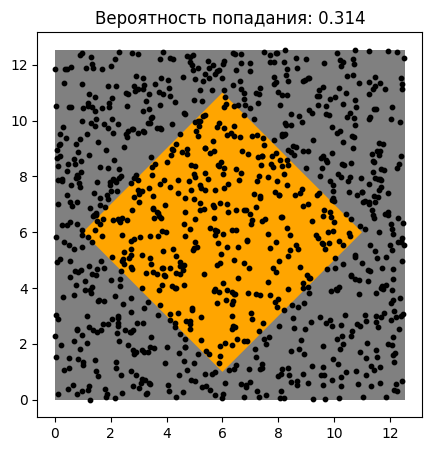

Оценка вероятности: 0.314


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon
import numpy as np

def darts(size):
    # Параметры мишени
    x0 = 6  
    y0 = 6  
    R = 5   
    
    # Вычисление стороны квадратного поля
    # Площадь круга: πR², площадь квадрата: side²
    # side = √(2πR²) - чтобы площадь квадрата была в 2 раза больше площади круга радиуса R
    side = np.sqrt(2 * np.pi * R ** 2)
    
    # Создание фигуры для отображения
    figsize = (5, 5)
    figur, ax = plt.subplots(figsize=figsize)

    # Создание серого прямоугольника (игровое поле)
    ax.add_patch(Rectangle((0, 0), side, side, facecolor='gray'))

    # СОЗДАНИЕ ОРАНЖЕВОГО РОМБА (МИШЕНИ):
    # Ромб задается четырьмя вершинами:
    diamond_vertices = [
        [x0, y0 + R],    
        [x0 + R, y0],      
        [x0, y0 - R],    
        [x0 - R, y0]     
    ]
    
    ax.add_patch(Polygon(diamond_vertices, facecolor='orange'))

    # Генерация случайных бросков дротиков
    X = np.random.uniform(0, side, size)  
    Y = np.random.uniform(0, side, size)  
    
    # Отображение бросков на графике
    plt.scatter(X, Y, marker='o', c='black', s=10)

    # ПРОВЕРКА ПОПАДАНИЙ В РОМБ:
    # Условие попадания в ромб: |X - x0| + |Y - y0| <= R
    inside_rhombus = (np.abs(X - x0) + np.abs(Y - y0)) <= R
    
    # Подсчет количества попаданий
    inside = np.sum(inside_rhombus)
    
    # Расчет вероятности попадания
    prob = inside / size

    # Настройка отображения
    plt.title(f'Вероятность попадания: {prob:.3f}')
    plt.gca().set_aspect('equal')  
    plt.show()

    return prob

result = darts(1000)
print(f"Оценка вероятности: {result}")